# Datasets

This task uses the <b>Abalone Dataset</b> (dataset.csv) which has been adapted to the needs of this task.
The dataset consists of:
  - 7 attributes
     * Length – The length of the abalone shell
     * Diameter – The diameter of the abalone shell
     * Height – The height of the abalone
     * Whole weight – The total weight of the abalone shell
     * Shucked weight – The weight of the abalone shell meat
     * Viscera weight – The weight of the internal organs of the abalone shell
     * Shell weight – The weight of dried abalone shells
  - 1 target
     * Class - Class of Abalone shells
  - 4177 rows of data

In [ ]:
import pandas as pd

# Import data
data = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/dataset.csv')
data.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [ ]:
label = data['Class'].to_frame() # Label on data (To be predicted during classification)
del data['Class'] # Removes labels and leaves only features in the data

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training set and test set
# with the number of training sets being 80% of the total data
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.8, random_state=42)

# CART (Classification and Regression Tree)

## Decision Trees

Decision Tree is a model that uses a structure in the form of a Binary Tree (Each node has a maximum of 2 children). Decision Trees are used in data science which is Supervised Learning (The model will be built using training data, then it will then be used to predict the output from the given data). The training data used to train the model will be converted into a series of rules in the form of a Binary Tree. The rules obtained are used for the prediction process on other data.

### Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model decision tree
dt_md5 = DecisionTreeClassifier(max_depth=5)
dt_md5.fit(data_train, label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluation

In [ ]:
# Predict testing data
predicted = dt_md5.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8157894736842105
Presisi: 0.6355140186915887
Recall: 0.37158469945355194
F1-score: 0.4689655172413793


### *Hyperparameters*

*Hyperparameters* are parameters that we can change/set the value of before we build the model that will be used. The aim of changing these parameters is to produce a model that is expected to work better.

There are several hyperparameters in various *machine learning* algorithms, one of which is the Decision Tree algorithm. The *Hyperparameters* contained in the Decision Tree algorithm in the `sklearn.tree` module are:
* `criterion` (Criteria to judge how good a node solves)
* `max_depth` (Maximum depth of Tree),
* `min_samples_split` (Minimum number of samples required to split an internal node)
* and others.

Further information can be seen in the following documentation:
[link text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Conduct training on the decision tree model
# The decision tree that is built has the hyperparameter max_depth=3
dt_md3 = DecisionTreeClassifier(max_depth=3)
dt_md3.fit(data_train, label_train)

# Predict testing data
predicted = dt_md3.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.7990430622009569
Presisi: 0.5483870967741935
Recall: 0.4644808743169399
F1-score: 0.5029585798816567


Changes in *hyperparameters* can affect the performance of the model. Initially with `max_depth = 5` the model produced 81% accuracy and 37% *recall*. After changing the *hyperparameter* with `max_depth = 3`, we get a decrease in model performance with an accuracy of 79% but an increase in *recall* to 46%.

What if we increase the `max_depth` number? Please explore these *hyperparameter* changes!

### Visualization of the Resulting Decision Tree

We can visualize the series of rules that form the Decision Tree that has been built. One way is to use the `sklearn.tree.plot_tree` module with the help of `matplotlib`.

The following is an example of decision tree visualization on the iris dataset:

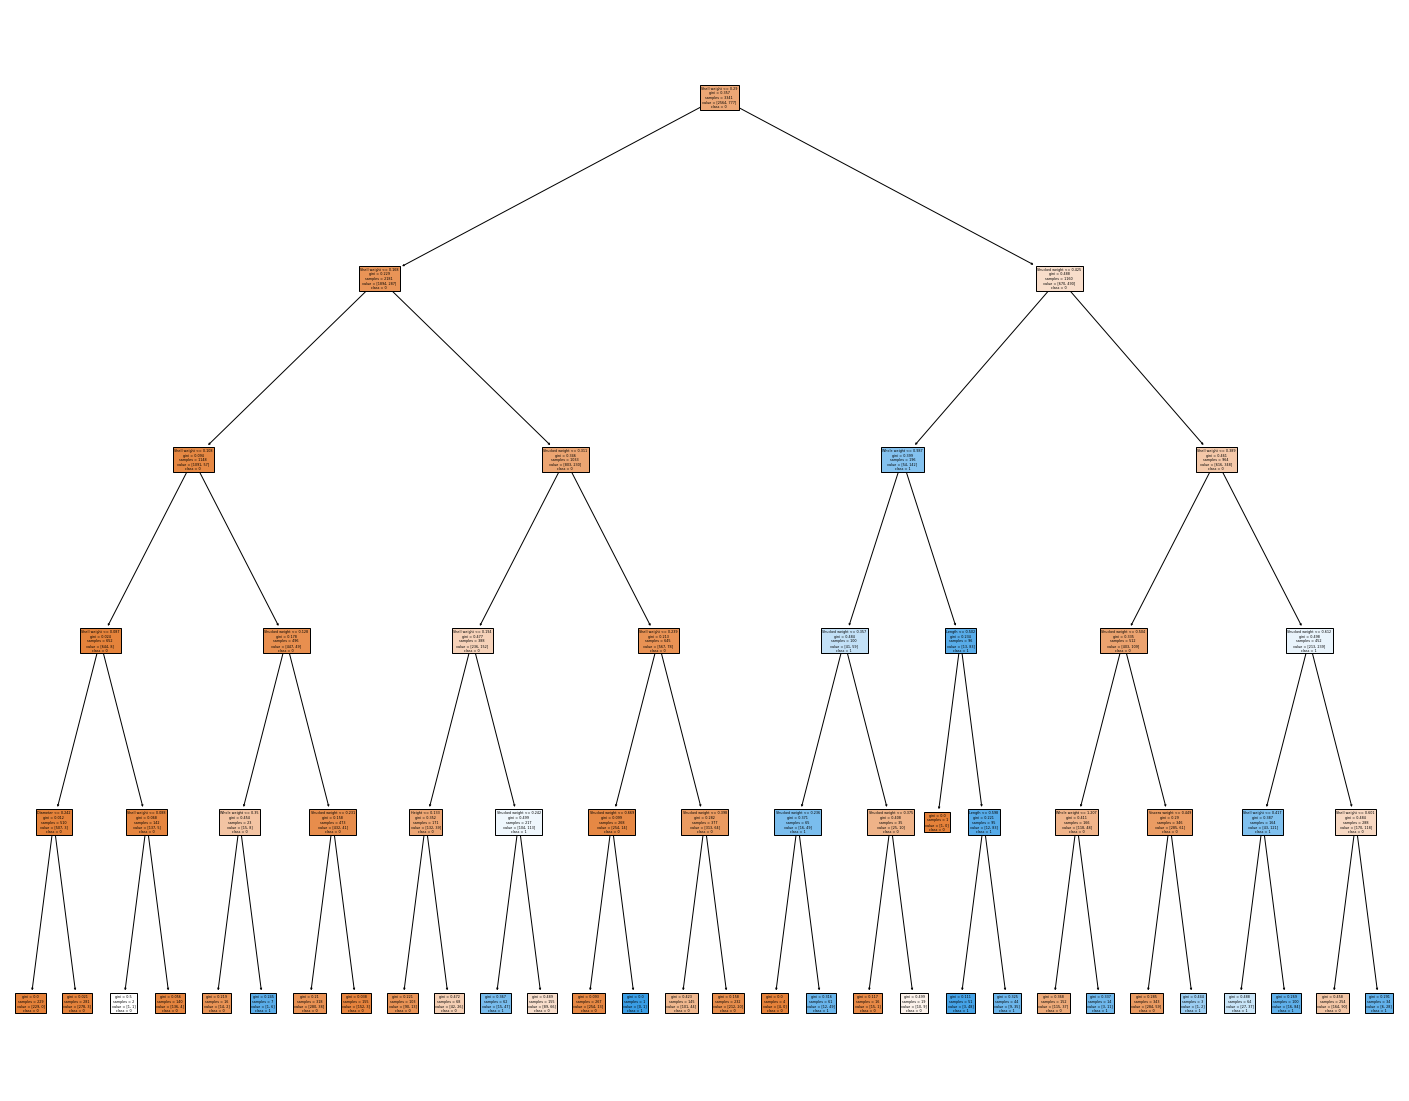

In [ ]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Visualize the decision tree that has been built previously
features = list(data_train.columns)
labels = [str(label) for labels in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md5, feature_names=features, class_names=labels, filled=True)

It can be seen that the resulting *decision tree* looks very complex. This carries the risk of *overfitting* and is also difficult to visualize. Therefore, changing the *hyperparameters* in the decision tree model can make the resulting model less complex.

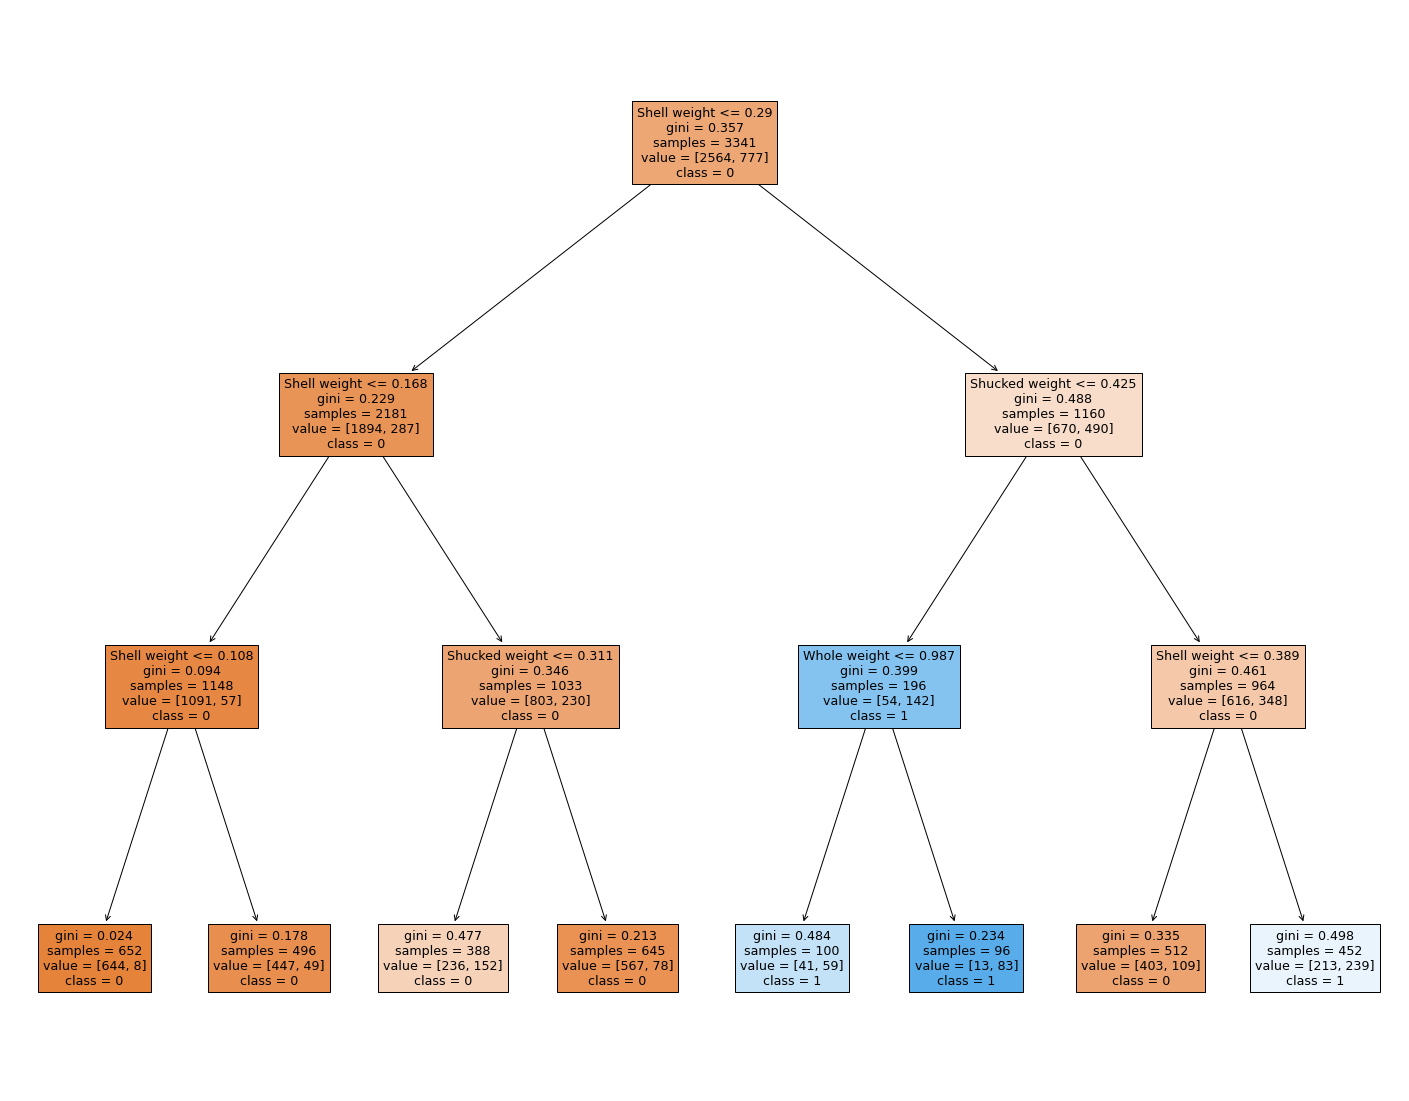

In [ ]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Visualize the decision tree that has been built previously
features = list(data_train.columns)
labels = [str(label) for labels in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md3, feature_names=features, class_names=labels, filled=True)

In the decision tree model above, restrictions are placed on the maximum depth by setting the value of `max_depth`. This *hyperparameter* change is made to get a model with the same type but different attributes. To choose the right *hyperparameters*, you usually pay attention to the distribution of data in the given dataset and are assisted by experience in carrying out a series of data science activities.

The selection of *hyperparameters* is usually referred to as *Hyperparameter Tuning* and there is a method called Grid Search Cross Validation which can be used to select the best *hyperparameter* from several *hyperparameters* provided based on certain criteria. If you are interested in implementing Grid Search Cross Validation, please look for it and practice it as an independent exercise.

Further information can be accessed in the following documentation: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Ensemble Learning

*Ensemble Learning* is a process where we use many models to get better results compared to using just one model. One type of *ensemble learning* is *bagging* (*bootstrap aggregating*).

In the *bagging* method, each model will be trained using a subset of the *training* data (not all of the training data is used in each *training* process). One subset of data can contain the same data (it doesn't have to be all different), this is what is called *bootstrap sampling*. Later, each model that has been trained will carry out a prediction process on new data. The final prediction results are obtained through a *majority voting* system where the final results will use the prediction results that appear the most in the models that have been created.

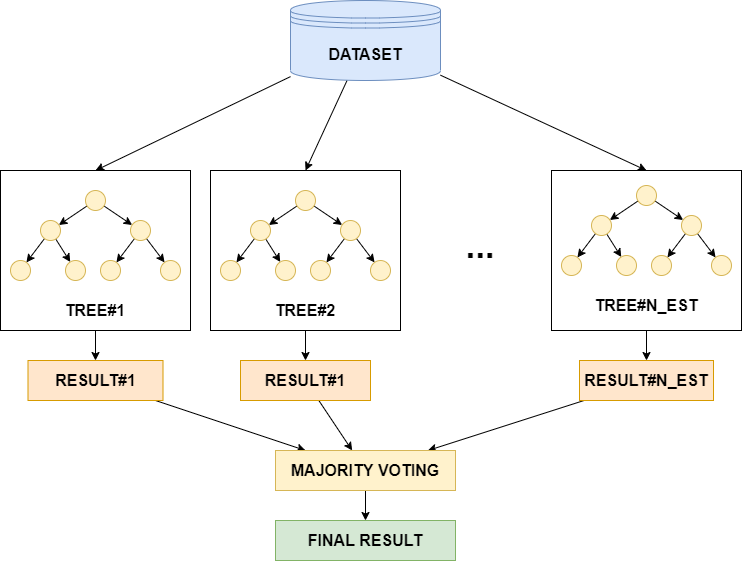

Sumber: Olahan Pribadi

## *Random Forest*

*Random Forest* is a variation of the *bagging* concept in *ensemble learning* which uses Decision Trees as the base model. Each model built is in the form of a Decision Tree and later the model is trained and used to make predictions. The output from Random Forest itself is the prediction result that appears most frequently among Decision Tree models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Conduct training on a random forest model
rf_md3 = RandomForestClassifier(max_depth=3)
rf_md3.fit(data_train, label_train)

# Predict testing data
predicted = rf_md3.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted))
print("Precision:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Akurasi: 0.7966507177033493
Presisi: 0.8823529411764706
Recall: 0.08196721311475409
F1-score: 0.15


It can be seen that significant changes occurred in the precision and *recall* metrics. The precision of Random Forest is higher than Decision Tree, but the *recall* aspect of Random Forest is lower than Decision Tree. The differences in these two aspects make the F1-score obtained also quite different.

It is hoped that we will study the advantages and disadvantages of each type of model being studied so that we can find out on what kind of dataset a type of model is suitable for use. So that the resulting model is better, we must also be able to choose *hyperparameters* that suit the problem we want to solve.

There are several *hyperparameters* that we can explore in Random Forest:
* `n_estimators` (How many decision trees will form a random forest)
* `max_depth` (Maximum depth of each Decision Tree),
* `min_samples_split` (Minimum number of samples required to split an internal node in each Decision Tree)
* and others.

Further information can be accessed in the following documentation: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Exercise

## 1

Implement a Decision Tree model to perform a classification task that predicts the `Class` of abalone shells.

Build a decision tree model by giving values to the *hyperparameters* `max_depth = 4` and .

In [ ]:
# training
dt_md4 = DecisionTreeClassifier(max_depth=4)
dt_md4.fit(data_train, label_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualization

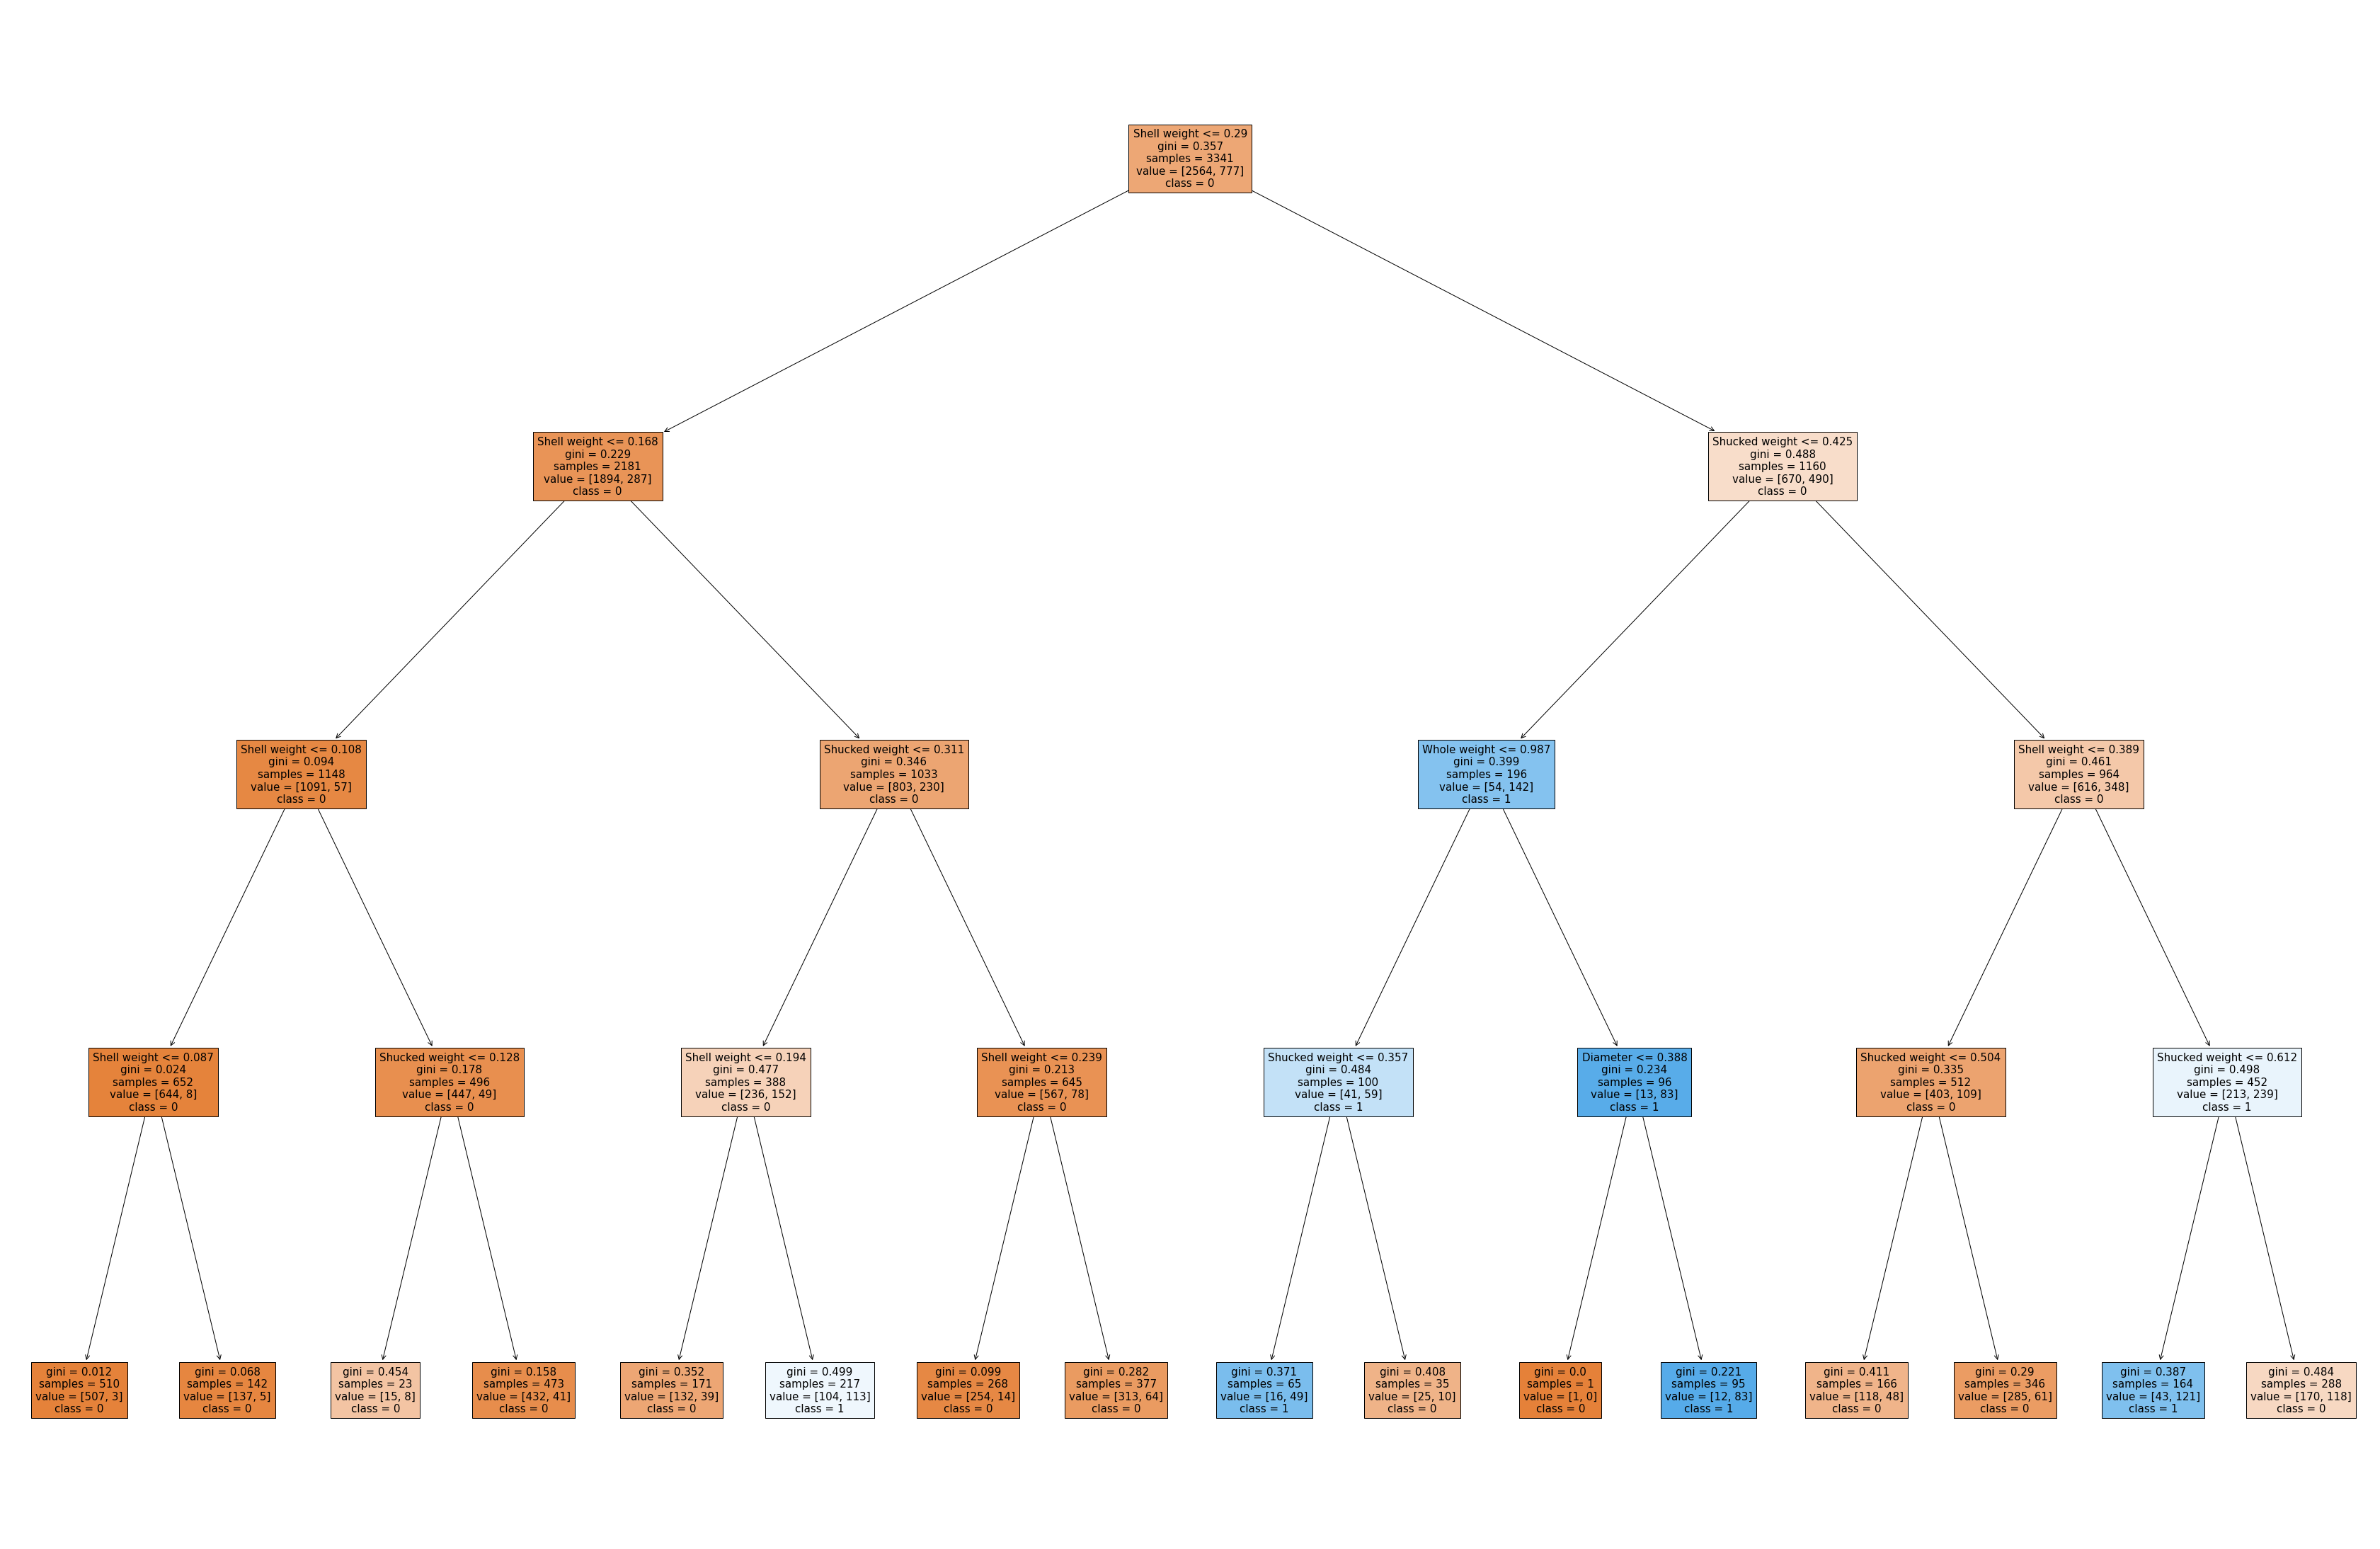

In [ ]:
# Visualize the decision tree that has been built previously
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(60,40))
_ = plot_tree(dt_md4, feature_names=features, class_names=labels, filled=True)

If given data X with the following features:
* `Length = 0.480`
* `Diameter = 0.350`
* `Height = 0.100`
* `Whole weight = 0.5750`
* `Shucked weight = 0.1950`
* `Viscera weight = 0.1245`
* `Shell weight = 0.200`


Based on the visualization produced in Problem 1b, what is the prediction result for `Class` from data X?
**Note:** There is no need to implement code in this section

* shell weight: 0,290
* <-- shell weight: 0,168
* --> shucked weight: 0.311
* <-- shell weight: 0.194
* --> gini = 0.499; samples = 217; values = [104,113]; class 1

## 2

Implement a Decision Tree model to perform a classification task that predicts the `Class` of abalone shells. The implementation of this problem will use the *hyperparameter* value `max_depth = 7` which is different from Problem 1. The purpose of questions 1 and 2 is so that we can see the differences in the results obtained in the two models that were built.

Build a decision tree model by giving a value to the *hyperparameter* `max_depth = 7`.

In [ ]:
# Conduct training on the decision tree model
# The decision tree that is built has the hyperparameter max_depth=3
dt_md7 = DecisionTreeClassifier(max_depth=7)
dt_md7.fit(data_train, label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the decision tree model obtained in question 2a!

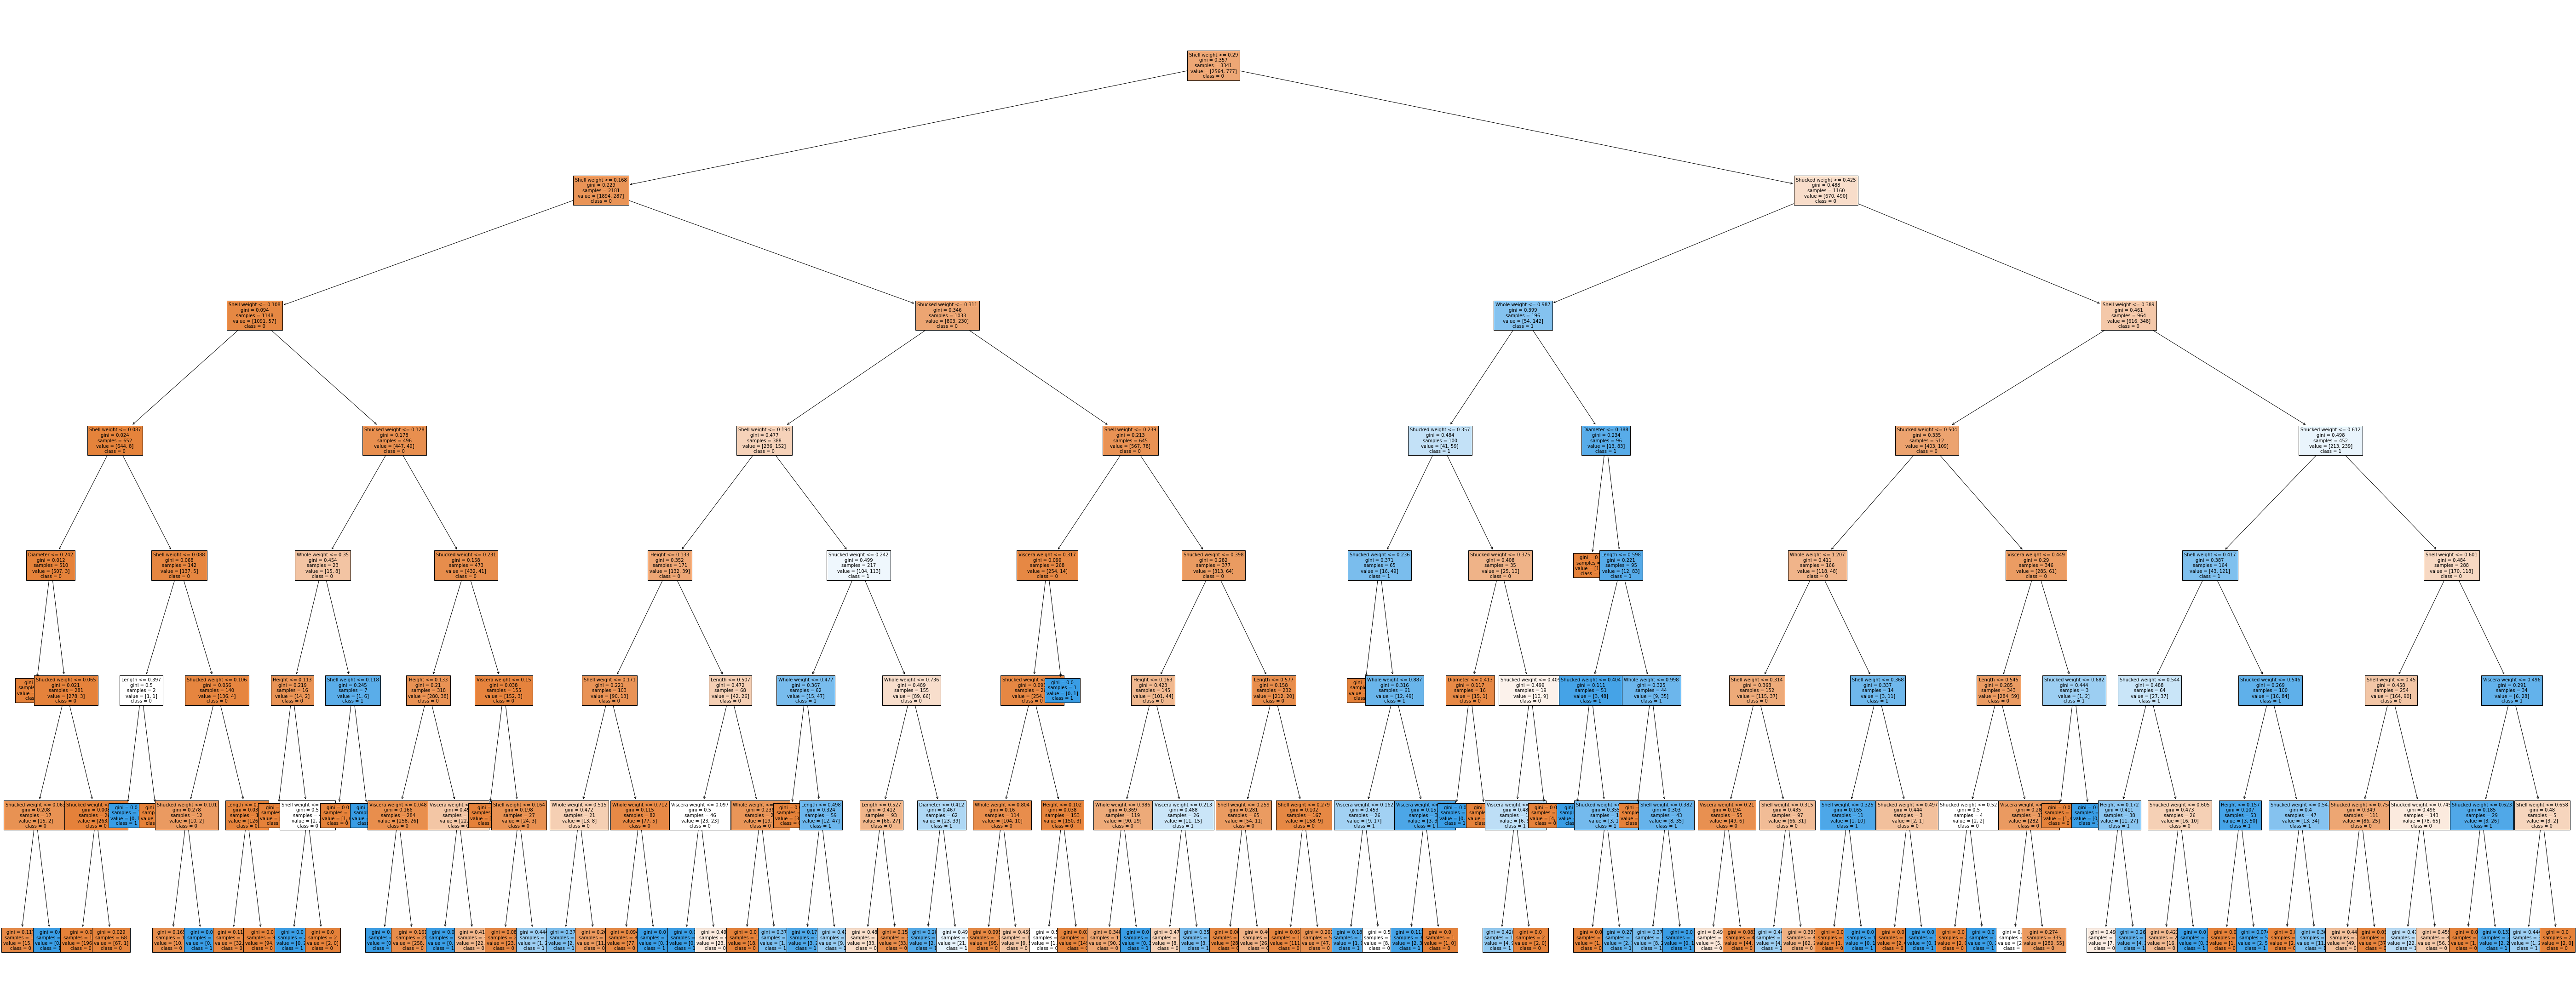

In [ ]:
# Visualize the decision tree that has been built previously
features = list(data_train.columns)
labels = [str(label) for labels in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(100,40))
_ = plot_tree(dt_md7, feature_names=features, class_names=labels, filled=True, fontsize=10)

If given data X with the following features:
* `Length = 0.400`
* `Diameter = 0.400`
* `Height = 0.135`
* `Whole weight = 0.5505`
* `Shucked weight = 0.1755`
* `Viscera weight = 0.1440`
* `Shell weight = 0.250`


Based on the visualization produced in Problem 2b, what is the prediction result for `Class` from data X?
**Note:** There is no need to implement code in this section

The following are the data results from X:

* shall weight <= 0.29
* <-- shall weight <= 0.168
* --> shucked weight <= 0.311
* <-- shell weight <= 0.194
* --> shucked weight <= 0.242
* <-- whole wight <= 0.477
* --> length <= 0.498
* <-- gini = 0.175; samples = 31; values = [3,28]; class 1

## 3

* Make predictions on *testing* data (`data_test`) using the model that was built in questions 1 and 2.
* Evaluate the prediction results obtained against the actual label (`label_test`). The evaluation metrics displayed are the accuracy, precision, recall and F1-Score values of the prediction results obtained.
* Compare the evaluation results obtained and write a brief analysis related to the comparison (Which model is better? Why is this model better?).

In [ ]:
# Implementation code here

print("Question 1")
# QUESTION 1
# Predict testing data
predicted1 = dt_md4.predict(data_test)
# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted1))
print("Precision:", precision_score(label_test, predicted1))
print("Recall:", recall_score(label_test, predicted1))
print("F1-score:", f1_score(label_test, predicted1))

print("Question 2")
# QUESTION 2
predicted2 = dt_md7.predict(data_test)
# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted2))
print("Precision:", precision_score(label_test, predicted2))
print("Recall:", recall_score(label_test, predicted2))
print("F1-score:", f1_score(label_test, predicted2))

Soal 1
Akurasi: 0.8038277511961722
Presisi: 0.5655172413793104
Recall: 0.44808743169398907
F1-score: 0.5
Soal 2
Akurasi: 0.8325358851674641
Presisi: 0.6462585034013606
Recall: 0.5191256830601093
F1-score: 0.5757575757575758


The greater the depth, the greater the prediction value.

## 4

Implement a Random Forest model with *hyperparameters* `max_depth = 7` and `n_estimators = 100` for the *task* classification `Class` of abalone shells.

In [ ]:
rf_md71 = RandomForestClassifier(max_depth=7, n_estimators=100)
rf_md71.fit(data_train, label_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 5

Implement a Random Forest model with *hyperparameters* `max_depth = 7` and `n_estimators = 50` for the *task* classification `Class` of abalone shells.

In [ ]:
rf_md72 = RandomForestClassifier(max_depth=7, n_estimators=50)
rf_md72.fit(data_train, label_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 6

* Make predictions on *testing* data (`data_test`) using the model that was built in questions 4 and 5.
* Evaluate the prediction results obtained against the actual label (`label_test`). The evaluation metrics displayed are the accuracy, precision, recall and F1-Score values of the prediction results obtained.
* Compare the evaluation results obtained and write a brief analysis related to the comparison (Which model is better? Why is this model better?).

In [ ]:
# Implementation code here

# Question 4
print("Question 4")
predicted4 = rf_md71.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted4))
print("Precision:", precision_score(label_test, predicted4))
print("Recall:", recall_score(label_test, predicted4))
print("F1-score:", f1_score(label_test, predicted4))

# Question 5
print("Question 5")
predicted5 = rf_md72.predict(data_test)

# Displays evaluation metrics in the form of accuracy, precision, recall and F1-Score values
print("Accuracy:", accuracy_score(label_test, predicted5))
print("Precision:", precision_score(label_test, predicted5))
print("Recall:", recall_score(label_test, predicted5))
print("F1-score:", f1_score(label_test, predicted5))

Soal 4
Akurasi: 0.8409090909090909
Presisi: 0.7403846153846154
Recall: 0.4207650273224044
F1-score: 0.5365853658536586
Soal 5
Akurasi: 0.833732057416268
Presisi: 0.7291666666666666
Recall: 0.3825136612021858
F1-score: 0.5017921146953405


The purpose of n_estimator is to control the number of trees in the classifier. From question 4, the number of trees in the classifier is 100, while in question 6 there are 50. From the definition, I can assume that an n_estimator with a value of 100 will produce a more accurate value, because the amount of data is greater. It can be seen from the prediction above that the accuracy value for question number 4 with n_estimator is greater, the number is greater. Indicates that the bigger the n_estimator, the bigger the prediction value.

However, there are also conditions that allow the accuracy of the prediction not to be determined from the n_estimator, namely when increasing the n_estimator also increases the correlation between increases, and when the correlation increases, the prediction will be difficult to read more complex structures because of the large number of similarities found.